<a href="https://colab.research.google.com/github/siddhesh1503/ML-Projects/blob/main/SMS_SPAM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2192,ham,Congrats ! Treat pending.i am not on mail for ...,NaN,NaN,NaN
1435,ham,Dad went out oredi...,NaN,NaN,NaN
3529,ham,Tyler (getting an 8th) has to leave not long a...,NaN,NaN,NaN
3048,ham,Lol they don't know about my awesome phone. I ...,NaN,NaN,NaN
5270,ham,Did u fix the teeth?if not do it asap.ok take ...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# **1. Data Cleaning**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
5372,ham,"Ok., is any problem to u frm him? Wats matter?"
5314,spam,Get the official ENGLAND poly ringtone or colo...
4865,ham,"Oh! Shit, I thought that was your trip! Looooo..."
1227,ham,So Ì_'ll be submitting da project tmr rite?
1055,ham,I'm at work. Please call


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1199,ham,NEFT Transaction with reference number &lt;#&...
1388,ham,Oh k.i think most of wi and nz players unsold.
1667,ham,So now my dad is gonna call after he gets out ...
1736,ham,I will come tomorrow di
1850,ham,Then cant get da laptop? My matric card wif Ì_...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [16]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()


np.int64(0)

In [19]:
df.shape

(5169, 2)

# **2. EDA**

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

,count
target,
0,4516
1,653


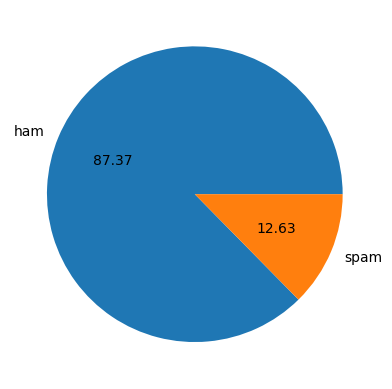

In [22]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# Data is imbalanced

In [24]:
import nltk

In [25]:
!pip install nltk

In [26]:
df['num_characters'] = df['text'].apply(len)

/tmp/ipython-input-253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words
nltk.download('punkt')
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

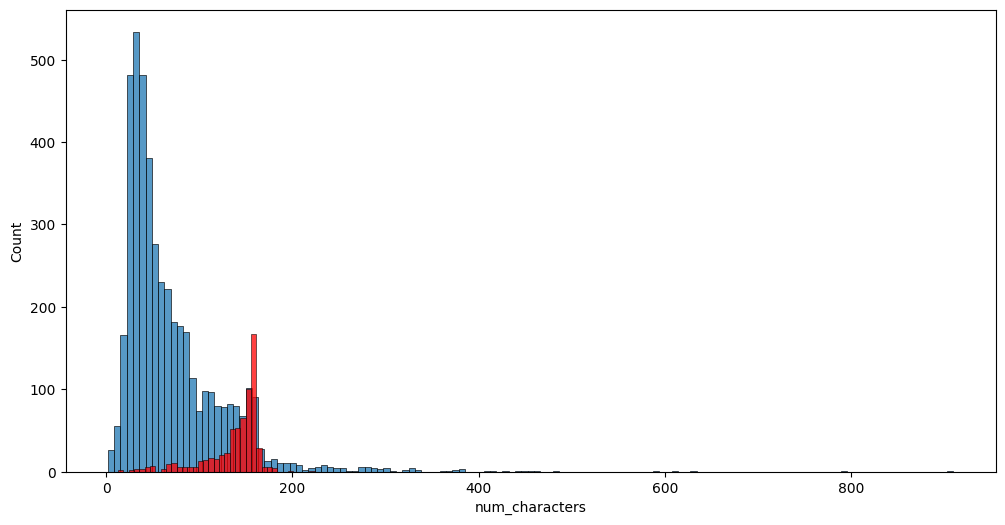

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

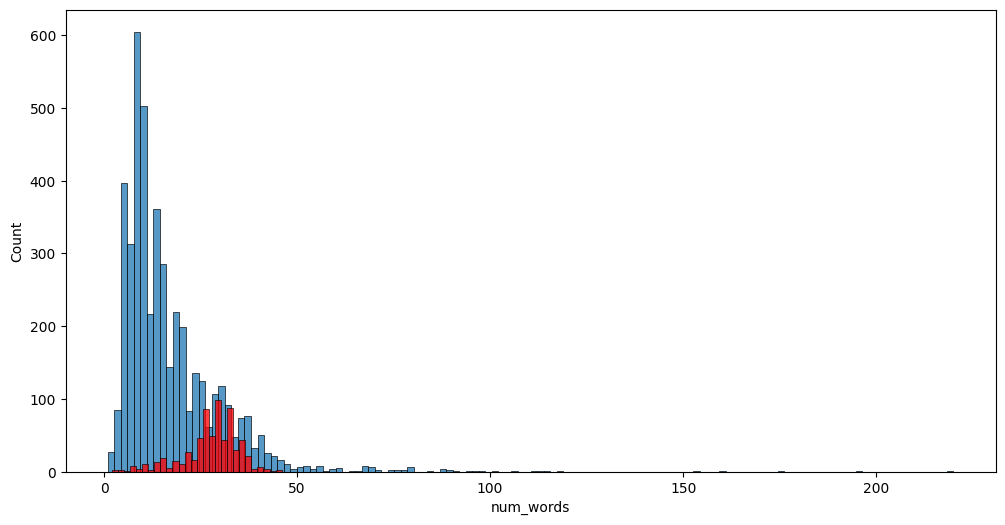

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

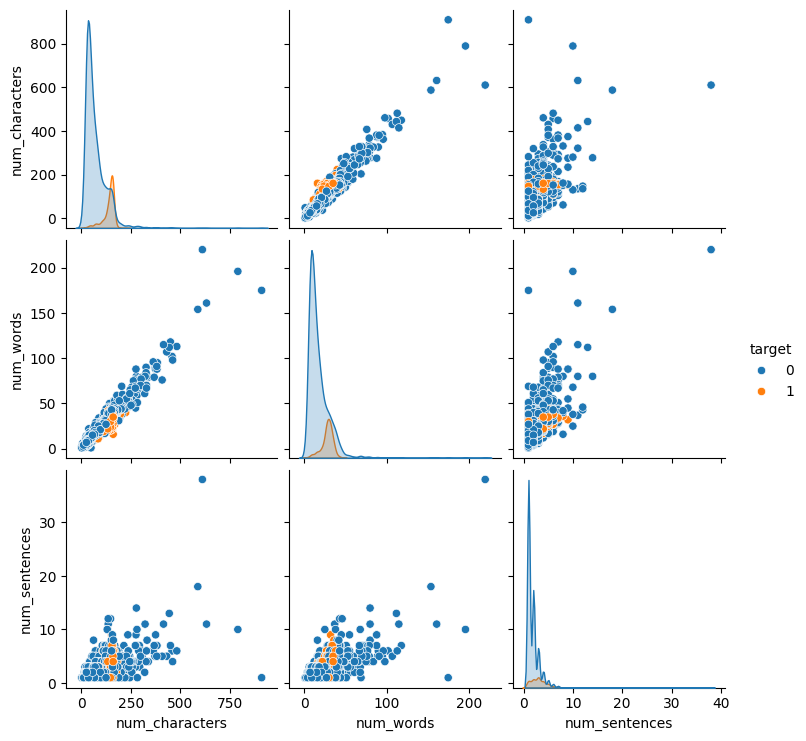

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

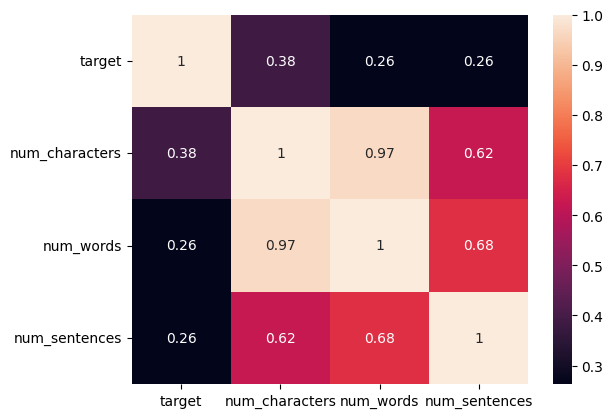

In [42]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

**3. Data Preprocessing
Lower case**

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

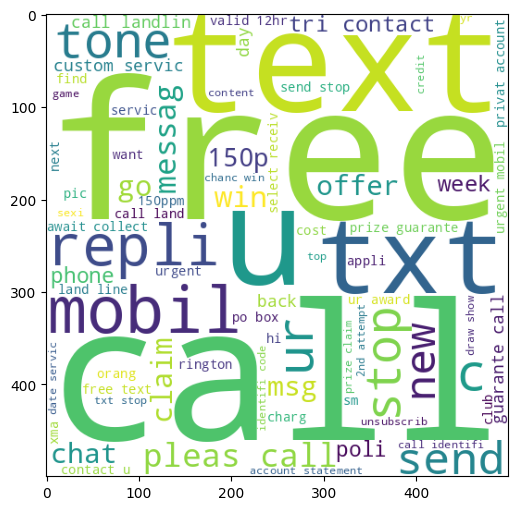

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

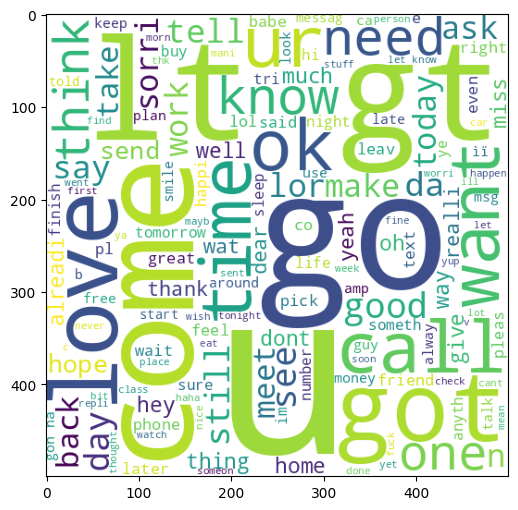

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

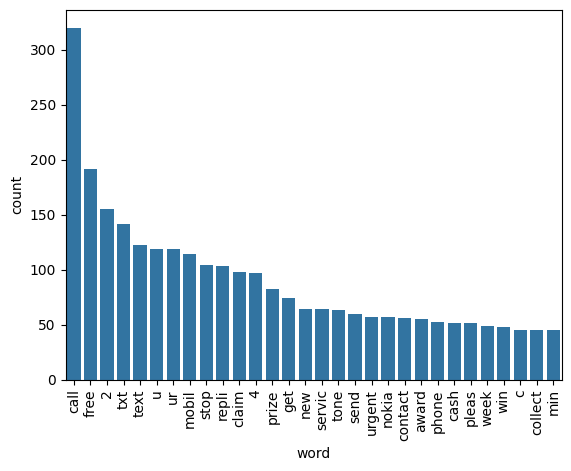

In [63]:
from collections import Counter
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35404

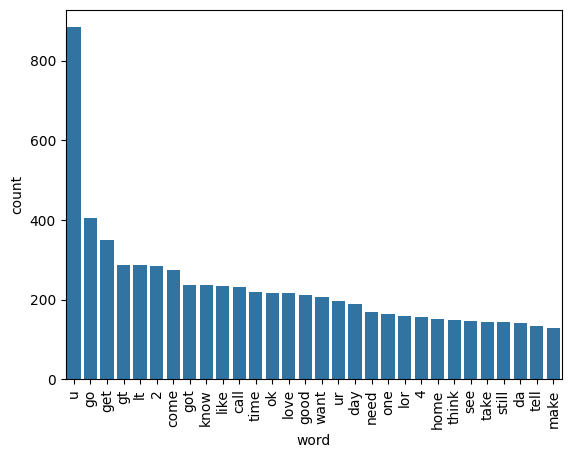

In [67]:
from collections import Counter
ham_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **4. Model Building**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [72]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [73]:
X.shape

(5169, 3000)

In [74]:
y = df['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [82]:
# tfidf --> MNB

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [86]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [87]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [90]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [91]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [92]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.933269


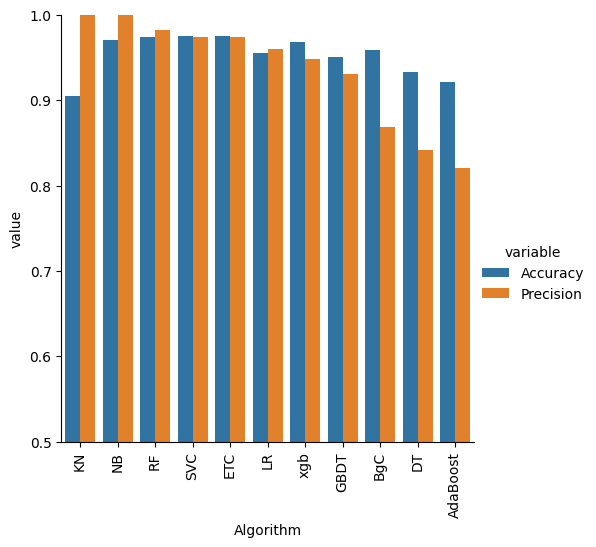

In [93]:

sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [97]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [98]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [100]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [101]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [102]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [103]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [105]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [106]:
from sklearn.ensemble import StackingClassifier

In [107]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [108]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

To fix the `NotFittedError` in your `app.py`, you need to load the saved `tfidf` vectorizer and `mnb` model that you pickled in the Colab notebook. Here's how you can load them in your Python script:

In [110]:
import pickle

# Load the vectorizer
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Load the model
model = pickle.load(open('model.pkl', 'rb'))

# Now, you can use the loaded vectorizer and model to make predictions
# For example, to predict on a new text:
# new_text = "Hey there! how are you doing?"
# vector_input = vectorizer.transform([new_text])
# result = model.predict(vector_input)[0]
# print(result)

In [113]:
import streamlit as st
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# --------------------------
# NLTK Downloads (Safe Check)
# --------------------------
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

ps = PorterStemmer()

# --------------------------
# Text Preprocessing Function
# --------------------------
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():     # Keep only words + numbers
            y.append(i)

    text = y[:]            # Copy filtered list
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))   # Apply stemming

    return " ".join(y)

# --------------------------
# Load Saved Model + Vectorizer
# --------------------------
try:
    # Ensure these .pkl files are in the same directory as app.py
    tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
    model = pickle.load(open('model.pkl', 'rb'))
except Exception as e:
    st.error(f"❌ Error loading model/vectorizer. Make sure 'vectorizer.pkl' and 'model.pkl' are in the same directory as this app.py file: {e}")
    st.stop() # Stop the app if loading fails

# --------------------------
# Streamlit App UI
# --------------------------
st.title("📩 Email/SMS Spam Classifier")
st.markdown("### Enter a message below to check whether it's Spam or Not Spam")

input_sms = st.text_area("✉ Type your message here")

if st.button('🔍 Predict'):

    if input_sms.strip() == "":
        st.warning("Please enter a message first!")
        st.stop()

    # 1. Preprocess
    transformed_sms = transform_text(input_sms)

    # 2. Vectorize
    # Ensure vectorizer expects a list, even for a single message
    vector_input = tfidf.transform([transformed_sms])

    # 3. Predict
    result = model.predict(vector_input)[0]

    # 4. Display Result
    if result == 1:
        st.error("🚨 **Spam Message Detected!**")
    else:
        st.success("✔️ **This is NOT Spam!**")


2025-11-24 16:17:16.158 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-24 16:17:16.552 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-24 16:17:16.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-24 16:17:16.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-24 16:17:16.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-24 16:17:16.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-24 16:17:16.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-24 16:17:16.579 Thread 'MainThread': mi

In [112]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.1 MB/s eta 0:00:00
